In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt
import tensorflow
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
# Load the data
data = pd.read_csv('Corona_NLP.csv')

In [3]:
# Show data
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
# Count the sentiments in the data
fig=px.histogram(data,
                x='Sentiment',
                title='Sentiment Count ',
                color_discrete_sequence=['blue'])
fig.update_layout(bargap=0.1)
fig.show()
# Show the sentiment distribution
fig = px.pie(data, names='Sentiment',title="Sentiment Distribution")
fig.show()

In [6]:
# There are 'Extremely Positive and Exremely Negative classes in the data. Change them to Positive and Negative, respectively. 
def merge(df):
    df.replace(to_replace='Extremely Negative',value='Negative',inplace=True)
    df.replace(to_replace='Extremely Positive',value='Positive',inplace=True)
merge(data)

In [7]:
# Count the sentiments in the data
fig=px.histogram(data,
                x='Sentiment',
                title='Sentiment Count ',
                color_discrete_sequence=['blue'])
fig.update_layout(bargap=0.1)
fig.show()
# Show the sentiment distribution
fig = px.pie(data, names='Sentiment',title="Sentiment Distribution")
fig.show()

In [12]:
import string

def data_cleaning(data):
    cleaned_data = []
    fillerWord = ("so","yeah","okay","um","uh","mmm","ahan","uh","huh","ahm","oh","sooo","uh","huh","yeh","yah","hmm","bye")
    fillerword_reg= "bye[.,]|so[.,]|yeah[.,]|okay[.,]|um[.,]|uh[.,]|mmm[.,]|ahan[.,]|uh[.,]|huh[.,]|ahm[.,]|oh[.,]|sooo[.,]|uh[.,]|huh[.,]|yeh[.,]|yah[.,]|hmm[.,]"
    STOPWORDS = set(stopwords.words('english'))
    remove=["doesn't","not","nor","neither","isn't","hadn't","mightn't","needn't","wasn't"]
    for i in remove:
        STOPWORDS.discard(i)
    
    STOPWORDS.add(fillerWord)  
    for i in range(len(data)):
        tweet = re.sub("#", "", data[i])#extract hashtags
        tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '',tweet, flags=re.MULTILINE)#extract links
        html=re.compile(r'<.*?>')#extract html tags
        tweet =html.sub(r"", tweet)
        #extract symbols and characters
        tweet=re.sub(r'@\w+',"",tweet)
        tweet=re.sub(r'#\w+',"",tweet) 
        tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet) 
        punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
        tweet.rstrip(string.punctuation)
        tweet=re.sub('[^A-Za-z\s]+',"", tweet)
        tweet = tweet.lower()
        tweet = tweet.split()
        #Lemmatization to normalise text
        tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in STOPWORDS]
        tweet = ' '.join(tweet)
        filler=re.compile(fillerword_reg)
        tweet=filler.sub("",tweet)
        cleaned_data.append(tweet)
    return cleaned_data

In [74]:
# Preprocess and clean the data
texto_data=data['OriginalTweet'].tolist()
process_text=data_cleaning(texto_data)

cleaned_tweet =pd.DataFrame(process_text)
data['CleanedTweet']=cleaned_tweet
#cleaned_tweet.head()

data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak not im par...


In [75]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak not im par...
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,airline pilot offering stock supermarket shelf...
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Negative,response complaint not provided citing covid r...
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive,know getting tough rationing toilet paper coro...
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn coron...


In [76]:
# Show the text lengths
def text_length(tweet):
    str_len=len(tweet.split(" "))
    return(str_len)
data['OriginalLength']= data['OriginalTweet'].apply(lambda x:text_length(x))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet,OriginalLength
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,38
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,14
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...,40
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak not im par...,38


In [77]:
data['NewLength']= data['CleanedTweet'].apply(lambda x:text_length(x))
data['NewLength']= data['CleanedTweet'].apply(lambda x:text_length(x))
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet,OriginalLength,NewLength
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,8,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,38,28
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,14,12
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock not one empty please dont panic eno...,40,25
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid outbreak not im par...,38,24


In [78]:
from sklearn.model_selection import train_test_split
X=data['CleanedTweet']
y=data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # Use stratify to have the same proportion of each class

In [81]:
# Encode the labels 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50000,                   
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='<UNK>',
                      document_count=0)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

wordindex=tokenizer.word_index

In [89]:
# Prepare the train and test sets 
import tensorflow.keras.preprocessing.sequence as ps

max_length = 50
train_sequence = tokenizer.texts_to_sequences(X_train)
train_padding = ps.pad_sequences(train_sequence,maxlen=max_length,padding='post')
test_sequence = tokenizer.texts_to_sequences(X_test)
test_padding = ps.pad_sequences(test_sequence,maxlen=max_length,padding='post')

In [92]:
train_padding.shape

(32925, 50)

In [93]:
# Create the LSTM network
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras import Sequential

model_lstm = Sequential()
model_lstm.add(Embedding(50000,128,input_length=50))
model_lstm.add(LSTM(64, activation='relu', return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=3, activation="softmax"))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           6400000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 6,449,603
Trainable params: 6,449,603
Non-trainable params: 0
_________________________________________________________________


In [94]:
# One-hot encoding of class labels
import tensorflow as tf
trainy = tf.keras.utils.to_categorical(y_train)
testy = tf.keras.utils.to_categorical(y_test)

In [97]:
# Compile the model
model_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [99]:
# Saving the Weight Parameters, When Achieving a Higher Test Accuracy
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='/content/lstm.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

history = model_lstm.fit(train_padding, # Features
trainy, # Target vector
epochs=20,
callbacks=callbacks,
verbose=1, # Print description after each epoch
batch_size=32, # Number of observations per batch
validation_data=(test_padding, testy)) # Test data

Epoch 1/20
1029/1029 [==============================] - ETA: 0s - loss: 99.8590 - accuracy: 0.5224
Epoch 1: val_accuracy improved from -inf to 0.61893, saving model to /content/lstm.h5
1029/1029 [==============================] - 73s 71ms/step - loss: 99.8590 - accuracy: 0.5224 - val_loss: 2.1253 - val_accuracy: 0.6189
Epoch 2/20
1029/1029 [==============================] - ETA: 0s - loss: 1.9539 - accuracy: 0.6899
Epoch 2: val_accuracy improved from 0.61893 to 0.69145, saving model to /content/lstm.h5
1029/1029 [==============================] - 69s 67ms/step - loss: 1.9539 - accuracy: 0.6899 - val_loss: 0.9192 - val_accuracy: 0.6914
Epoch 3/20
1029/1029 [==============================] - ETA: 0s - loss: 0.7047 - accuracy: 0.7712
Epoch 3: val_accuracy improved from 0.69145 to 0.78013, saving model to /content/lstm.h5
1029/1029 [==============================] - 67s 65ms/step - loss: 0.7047 - accuracy: 0.7712 - val_loss: 1.7669 - val_accuracy: 0.7801
Epoch 4/20
1029/1029 [=============

In [107]:
# Load the trained model
from keras.models import load_model
network = load_model('/content/lstm.h5')

In [101]:
# Predict using the test set (Porbabilities)
preds=[]
predictions=network.predict(test_padding, verbose=1)

258/258 [==============================] - 4s 15ms/step


In [102]:
# Get the class labels (Maximum probability)
for i in range(len(predictions)):
    preds.append(np.argmax(predictions[i]))

0.8318756073858115

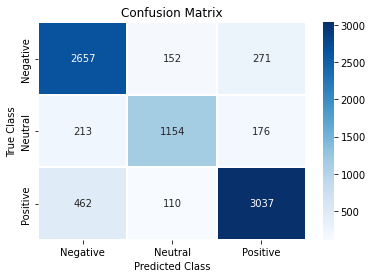

In [103]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
cf_matrix=confusion_matrix(y_test, preds)
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
accuracy_score(y_test, preds)

In [112]:
# Define the predict function
def predict(text, model):
    # Tokenize text
    x_test = ps.pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=50)
    # Predict
    score = model.predict([x_test])
#     print(score)
    # Decode sentiment
    label = np.argmax(score, axis=1)
    if label==0:
      print('It is Negative!')
    elif label==1:
      print('It is Neutral')
    else:
      print('It is Positive')

In [114]:
# Example
predict('I am really happy to see you', network)

It is Positive
